In [54]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import json

In [55]:
labels = {
    0: "ENTAILMENT",
    1: "NEUTRAL",
    2: "CONTRADICTION"
}

# Functions

In [62]:
def plot_heatmap(data, relative=True):
    data = pd.DataFrame(data, ["Entailment", "Neutral", "Contradiction"], ["Entailment", "Neutral", "Contradiction"])
    sn.set(font_scale=1.4)
    if relative:
        ax = sn.heatmap(data/data.to_numpy().sum(), cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='.2%')
    else:
        ax = sn.heatmap(data, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt=".0f")
    ax.set(xlabel='Predicted Label', ylabel='True Label')
    ax.xaxis.set_label_position('top')
    plt.tick_params(axis='both', which='major', labelbottom=False, bottom=False, top=False, labeltop=True)
    plt.show()

## Metrics by phenomena

default synonym


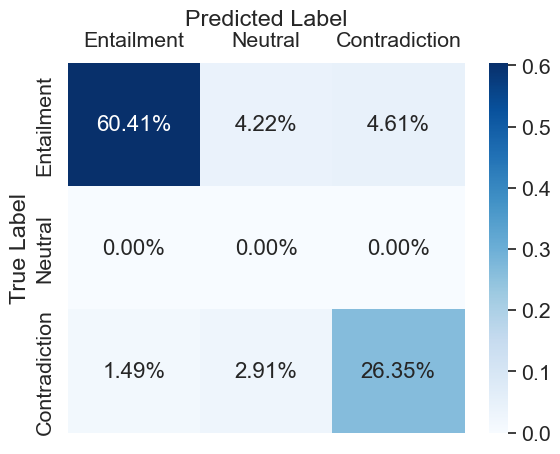

default antonym


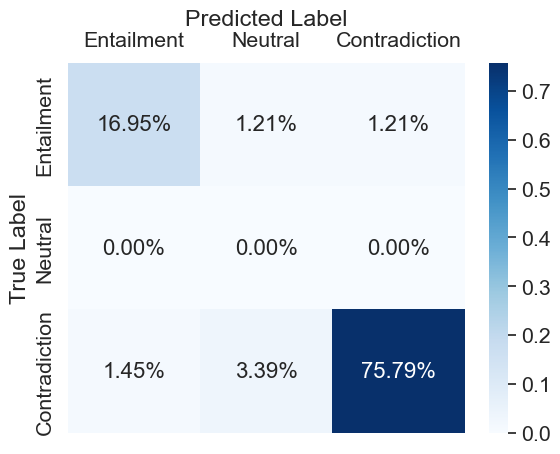

default hypernym


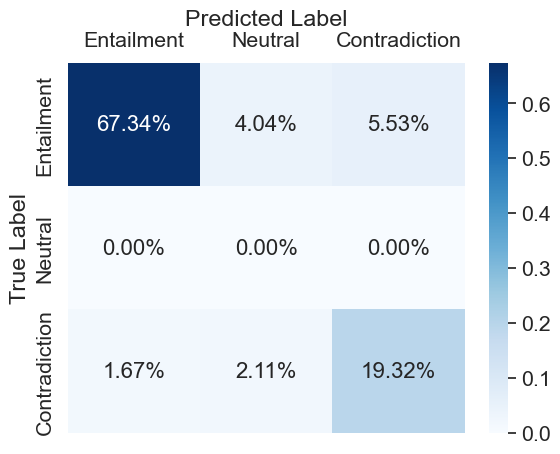

default hyponym


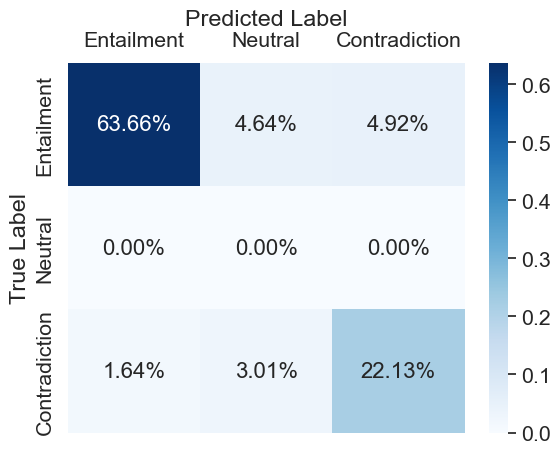

default co_hyponym


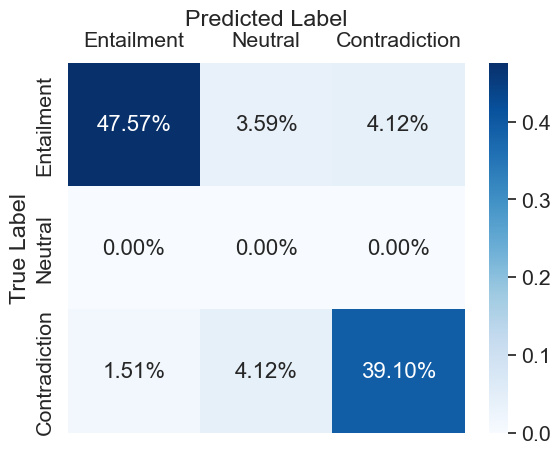

default quantifiers


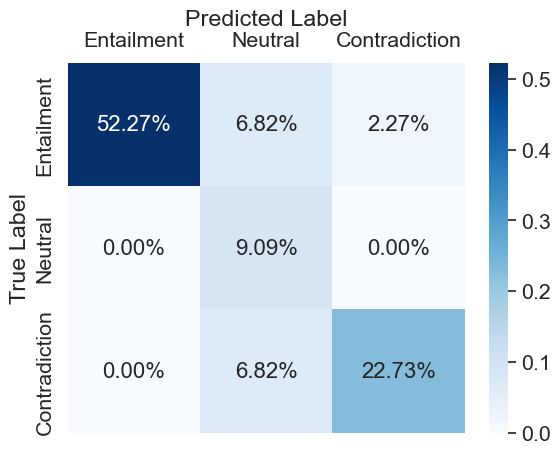

default numericals


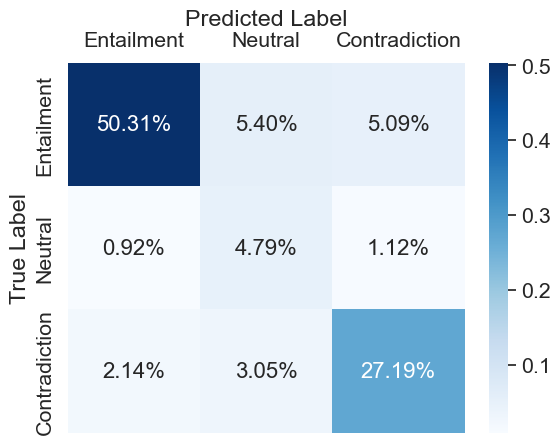

hypothesis-only synonym


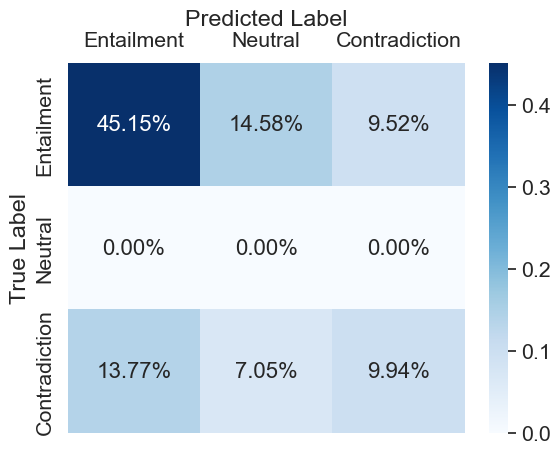

hypothesis-only antonym


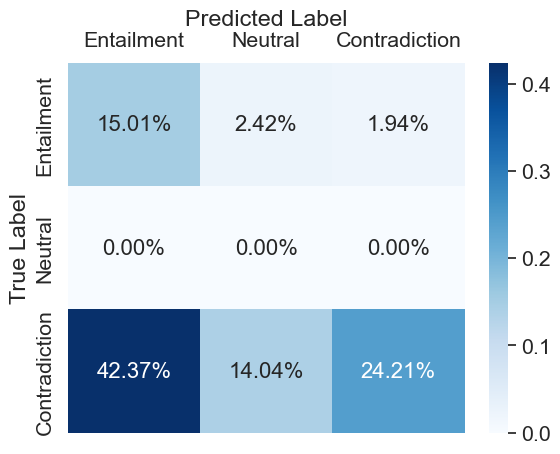

hypothesis-only hypernym


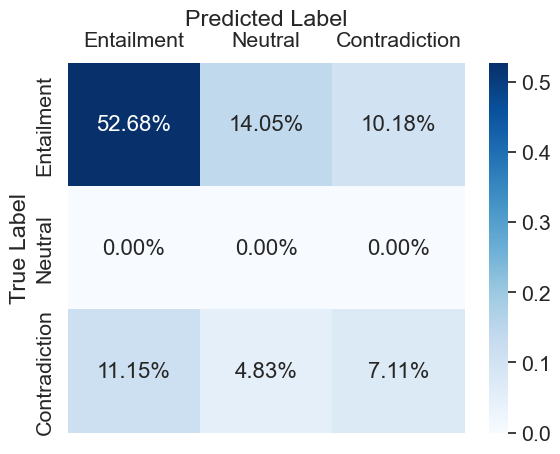

hypothesis-only hyponym


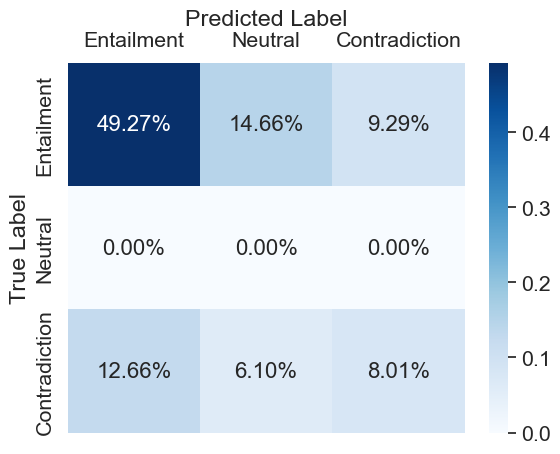

hypothesis-only co_hyponym


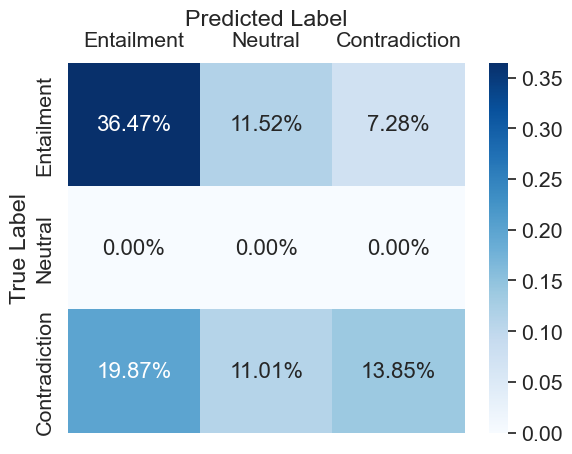

hypothesis-only quantifiers


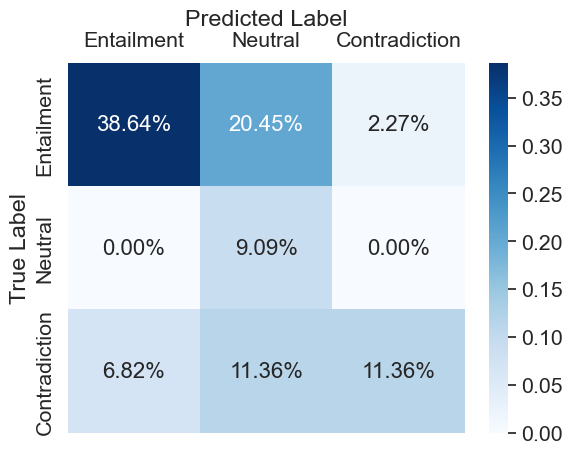

hypothesis-only numericals


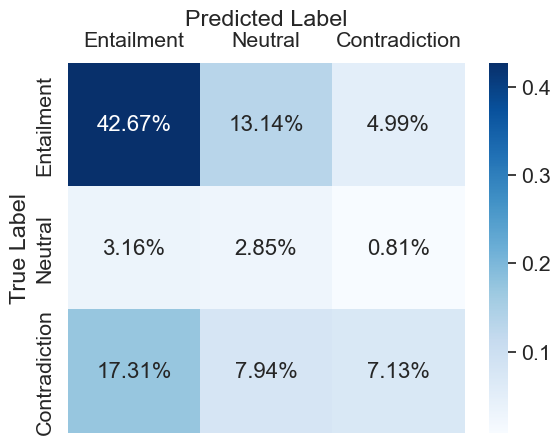

filtered synonym


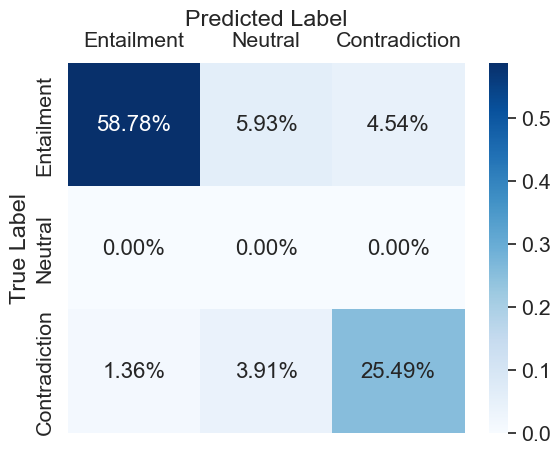

filtered antonym


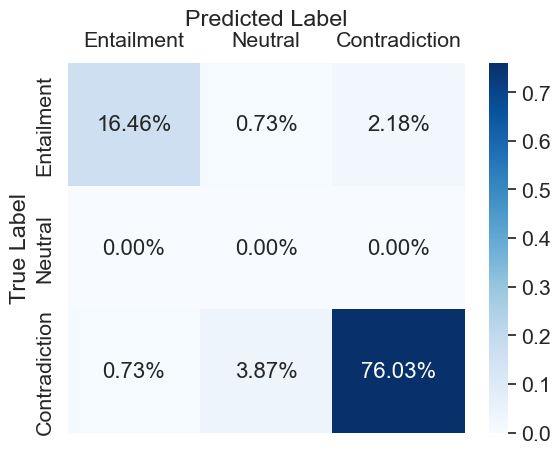

filtered hypernym


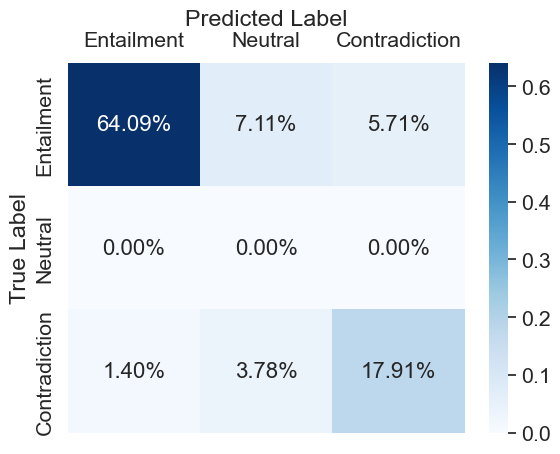

filtered hyponym


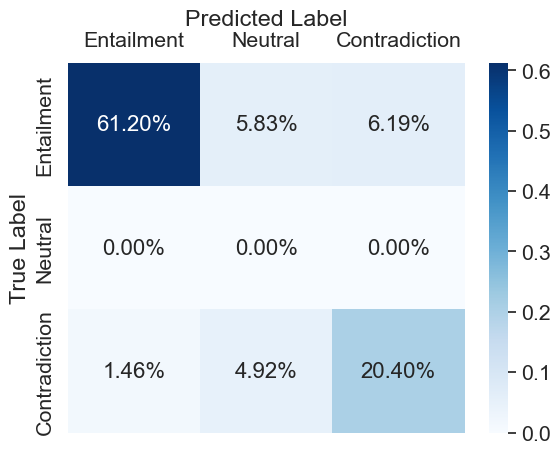

filtered co_hyponym


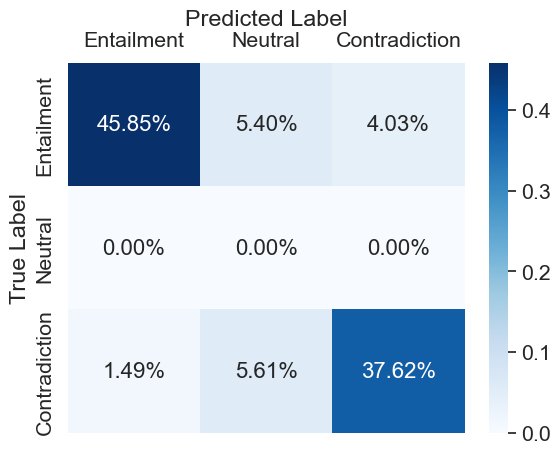

filtered quantifiers


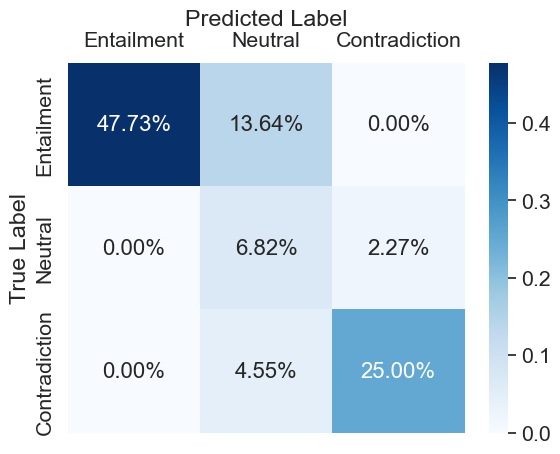

filtered numericals


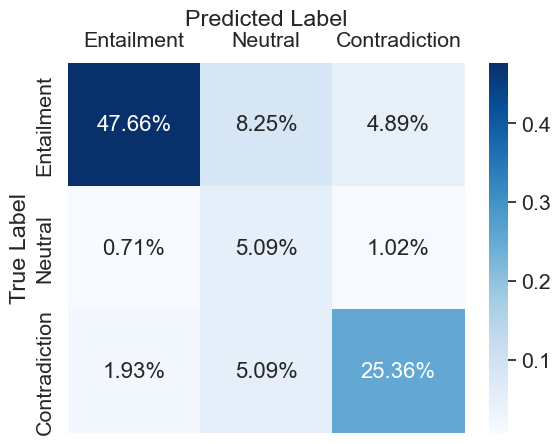

In [63]:
path_mapping = {
    "default": "../scripts/metrics_by_phenomena/results/roberta-base-finetuned-mnli.json",
    "hypothesis-only": "../scripts/metrics_by_phenomena/results/roberta-base-finetuned-mnli-hypothesis-only.json",
    "filtered": "../scripts/metrics_by_phenomena/results/roberta-base-finetuned-mnli-maximum_two_6.json"
}

for model in path_mapping.items():
    with open(model[1], "r") as f:
        metrics_data_hypothesis_only = json.load(f)
        for phenomenon_data in metrics_data_hypothesis_only:
            print(f"{model[0]} {phenomenon_data['task_name']}")
            plot_heatmap(phenomenon_data["confusion_matrix"], relative=True)